# Predicting Heart Disease using Machine Learning

Steps:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Preparing the Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve;

## Load Data

In [2]:
df = pd.read_csv('Data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

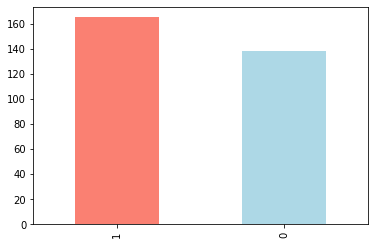

In [6]:
df['target'].value_counts().plot.bar(color=['salmon', 'lightblue'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according  to Sex

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


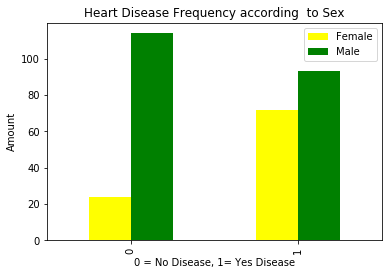

In [20]:
pd.crosstab(df['target'], df['sex']).plot.bar(color=['yellow', 'green'])
plt.title('Heart Disease Frequency according  to Sex')
plt.xlabel('0 = No Disease, 1= Yes Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])

In [22]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

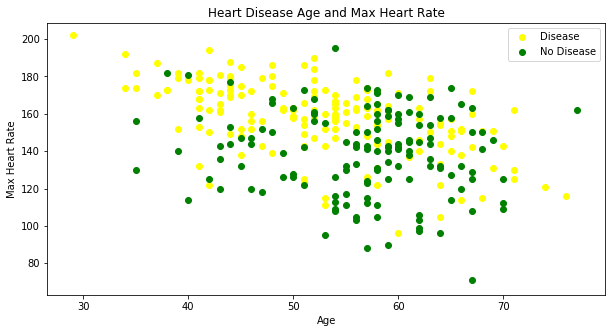

In [25]:
plt.figure(figsize=(10, 5))

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c='yellow')

plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c='green')

plt.title('Heart Disease Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

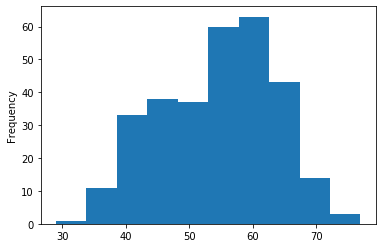

In [26]:
 df.age.plot.hist()

### Heart Disease frquency for Chest Pain Type

In [27]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


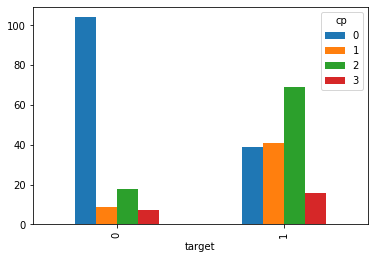

In [28]:
pd.crosstab(df.target, df.cp).plot.bar()

In [29]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


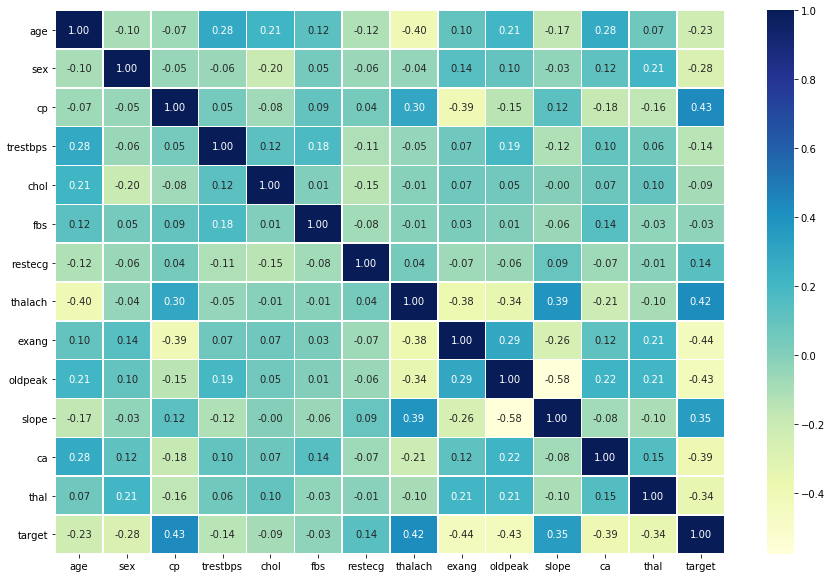

In [33]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

## Modelling

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [9]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [10]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [12]:
models = {
    'Logistic Regrassion': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and Evaluates given machine learning models.
    models: a dict of different sklearn machine learning models. 
    '''
    np.random.seed(42)
    
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

D:\Users\Elvin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regrassion': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

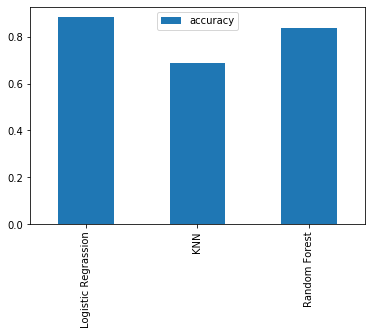

In [19]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

### HyperParameter Tuning by Hand

In [21]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the Test data: 75.41%


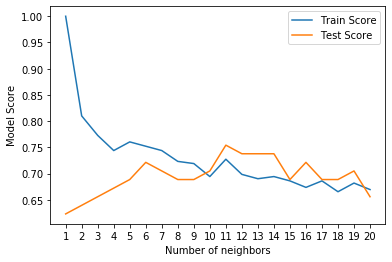

In [34]:
plt.plot(neighbors, train_scores,
         label='Train Score')
plt.plot(neighbors, test_scores,
         label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the Test data: {max(test_scores) * 100:.2f}%')

### HyperParameter Tuning by RandomizedSearchCV

In [36]:
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [37]:
# Tune Logistic Regrassion

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20)

rs_log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [40]:
# Tune Random Forest Classifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20)

rs_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [42]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## HyperParameter Tuning by GridSearchCV

In [10]:
# Tune Logistic Regrassion

log_reg_grid = {
    'C': np.logspace(-4, 4, 10),
    'solver': ['liblinear']
}

gs_log_reg = GridSearchCV(LogisticRegression(), 
                          log_reg_grid,
                          cv=5)

gs_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

In [11]:
gs_log_reg.best_params_

{'C': 0.3593813663804626, 'solver': 'liblinear'}

In [12]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned Machine Learning 

In [13]:
y_preds = gs_log_reg.predict(X_test)
y_preds[:5]

array([0, 1, 1, 0, 1], dtype=int64)

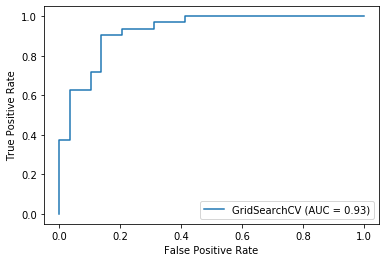

In [14]:
plot_roc_curve(gs_log_reg, X_test, y_test)

In [15]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

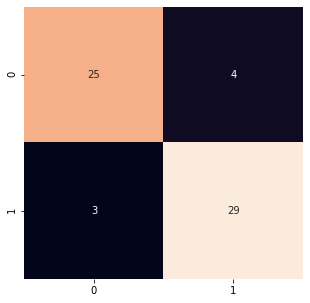

In [16]:
def plot_conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_true, y_preds),
                     annot=True,
                     cbar=False)
    
plot_conf_matrix(y_test, y_preds)

In [19]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation metrics using Cross-Validation

In [20]:
gs_log_reg.best_params_

{'C': 0.3593813663804626, 'solver': 'liblinear'}

In [21]:
clf = LogisticRegression(C=0.3593813663804626,
                         solver='liblinear')

In [24]:
cv_acc = np.mean(cross_val_score(clf, X, y, scoring='accuracy'))
cv_acc

0.8414207650273223

In [25]:
cv_precision = np.mean(cross_val_score(clf, X, y, scoring='precision'))
cv_precision

0.8201213818860877

In [26]:
cv_recall = np.mean(cross_val_score(clf, X, y, scoring='recall'))
cv_recall

0.9151515151515153

In [27]:
cv_f1 = np.mean(cross_val_score(clf, X, y, scoring='f1'))
cv_f1

0.864052334062442

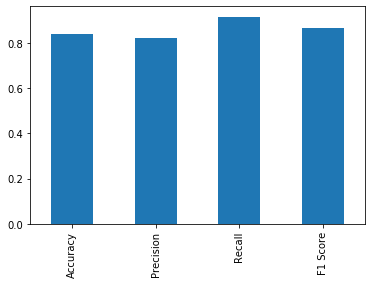

In [37]:
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1 Score': cv_f1
}, index=[0])

cv_metrics.T.plot.bar(legend=False)

### Feature Importance

In [38]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.3593813663804626, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)>

In [39]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.3593813663804626, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [40]:
clf.coef_

array([[ 0.00512923, -1.04783792,  0.71721941, -0.01179889, -0.00185976,
         0.06741202,  0.4010033 ,  0.02519737, -0.71662355, -0.59399449,
         0.53666711, -0.69490961, -0.76075958]])

In [43]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.005129230658847527,
 'sex': -1.0478379225987056,
 'cp': 0.7172194097101539,
 'trestbps': -0.011798893967269209,
 'chol': -0.0018597615276571239,
 'fbs': 0.06741202309734647,
 'restecg': 0.4010033012238776,
 'thalach': 0.02519737443557368,
 'exang': -0.7166235480370926,
 'oldpeak': -0.5939944912552355,
 'slope': 0.5366671062509928,
 'ca': -0.6949096131087437,
 'thal': -0.7607595819826143}

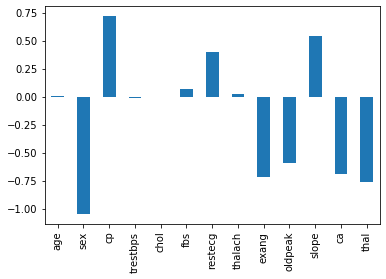

In [44]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(legend=False)